### **1. Importing necessary libraries**

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd

### **2. Viewing the dataset**

In [2]:
data = pd.read_csv(
    '../dataset/Sleep_health_and_lifestyle_dataset.csv'
).fillna('None')

data

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


### **3. Sleep disorder**

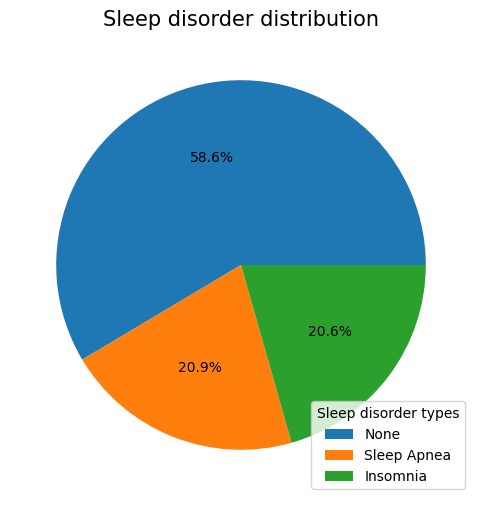

In [43]:
sleep_disorder = data['Sleep Disorder'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(sleep_disorder, autopct='%1.1f%%')
plt.title('Sleep disorder distribution', fontsize=15)
plt.legend(title='Sleep disorder types', labels=sleep_disorder.index,
           loc='lower right')

plt.show()

- Most people (58.6%) do not have any sleep disorder;
- 20.9% of people suffer from insomnia;
- 20.6% of people suffer from sleep apnea.

### **4. By gender**

#### 4.1. Sleep disorder

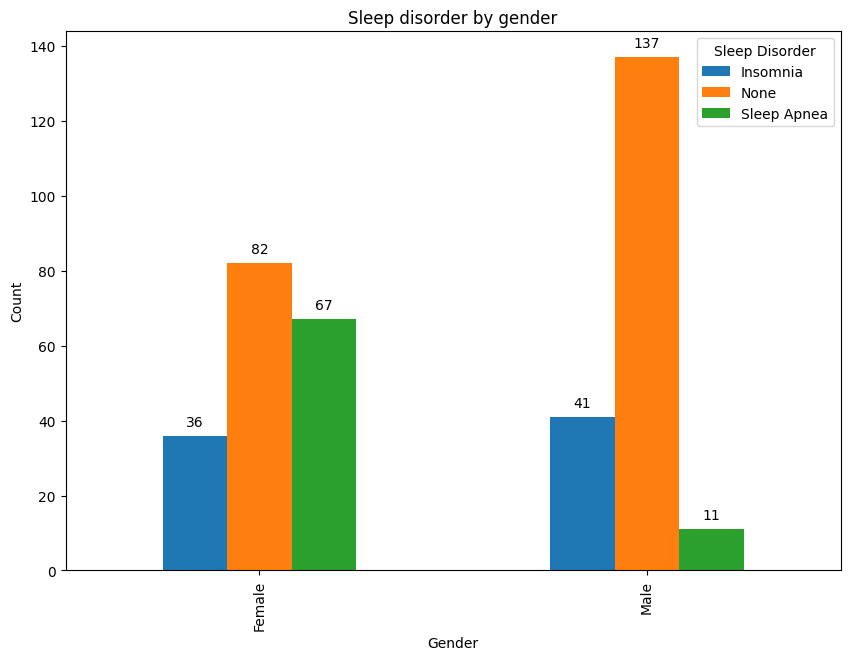

In [42]:
gender_sleep = data.groupby('Gender')['Sleep Disorder'].value_counts()
gender_sleep = gender_sleep.unstack(-1)

ax = gender_sleep.plot.bar(figsize=(10, 7))

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.ylabel('Count')
plt.title('Sleep disorder by gender')

plt.show()

- Most men and women do not have any sleep disorder;
- Sleep apnea affects more women;
- Insomnia is more prevalent in men.

#### 4.2. BMI Category

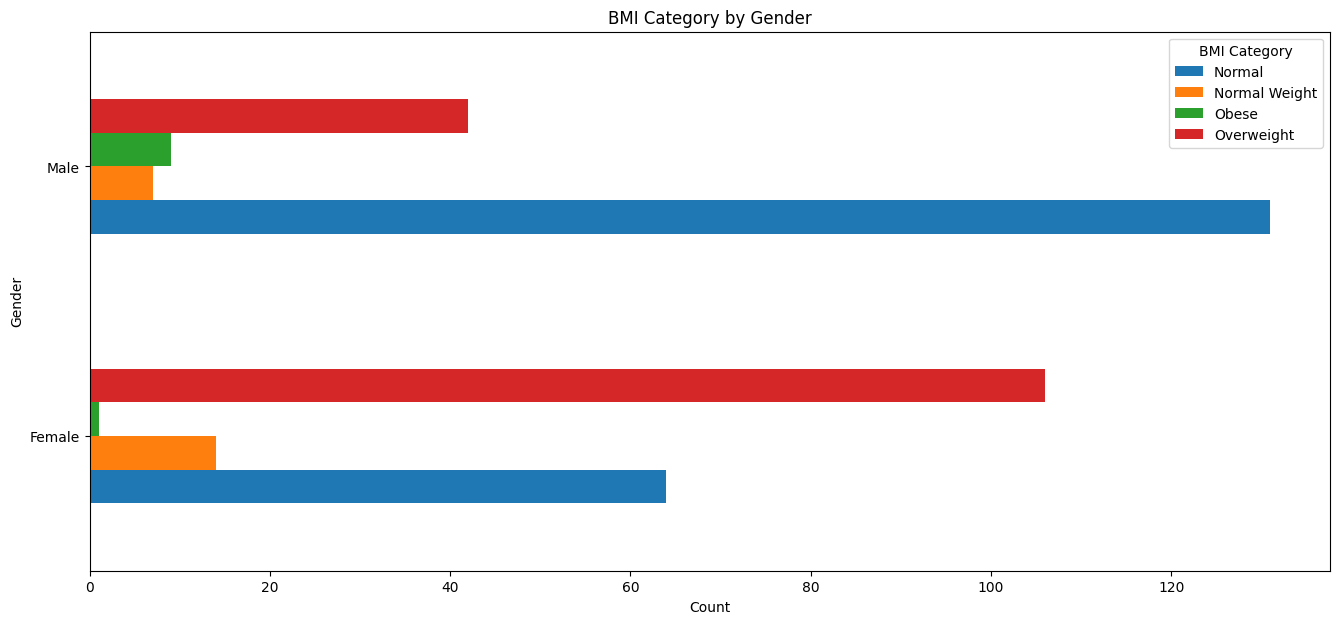

In [60]:
bmi_gender = data.groupby('Gender')['BMI Category'].value_counts()
bmi_gender = bmi_gender.unstack(-1)

bmi_gender.plot.barh(figsize=(16, 7))
plt.title('BMI Category by Gender')
plt.xlabel('Count')

plt.show()

- Many men have a normal weight;
- Many women are overweight;
- There are more men who are obese than women;
- There are more women with a normal weight than men.

### **5. By occupation**

#### 5.1. Distribution

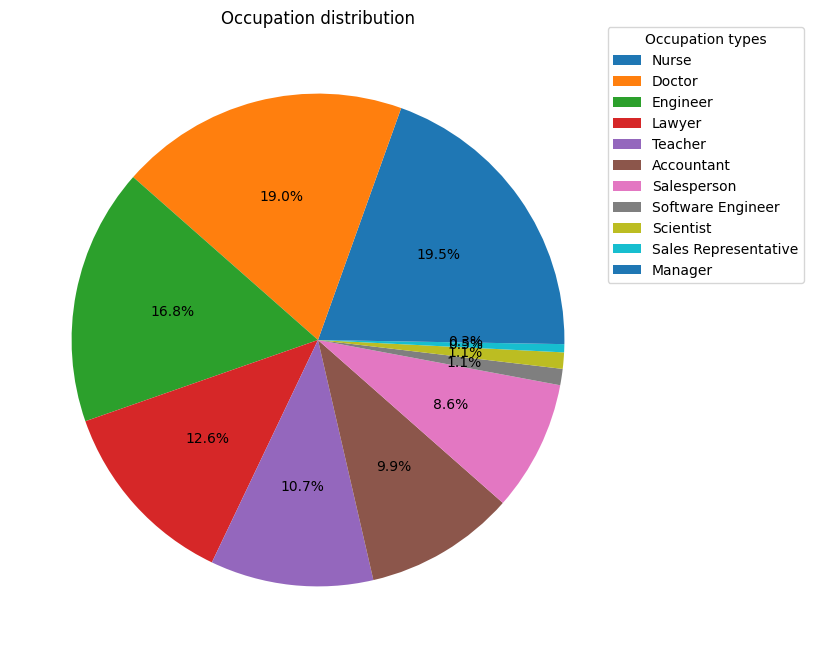

In [99]:
occupation = data['Occupation'].value_counts()

plt.figure(figsize=(12, 8))
plt.pie(occupation, autopct='%1.1f%%')
plt.legend(title='Occupation types', labels=occupation.index, bbox_to_anchor=(1.3, 0.8), loc="center right")
plt.title('Occupation distribution')

plt.show()

#### 5.2. Sleep disorder

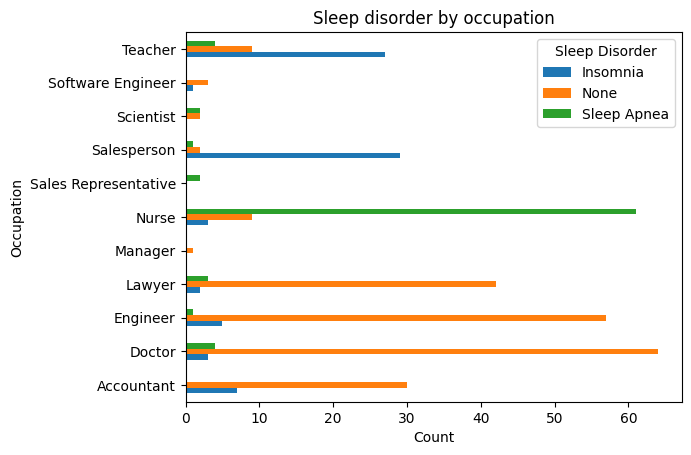

In [109]:
sleep_occupation = data.groupby('Occupation')['Sleep Disorder'].value_counts()
sleep_occupation = sleep_occupation.unstack(-1)

sleep_occupation.plot.barh()
plt.xlabel('Count')
plt.title('Sleep disorder by occupation')

plt.show()

- Many doctors, lawyers, engineers, and accountants do not have any sleep disorder;
- Sleep apnea affects more nurses;
- Insomnia is more prevalent among teachers and salespeople.

#### 5.3. Stress level

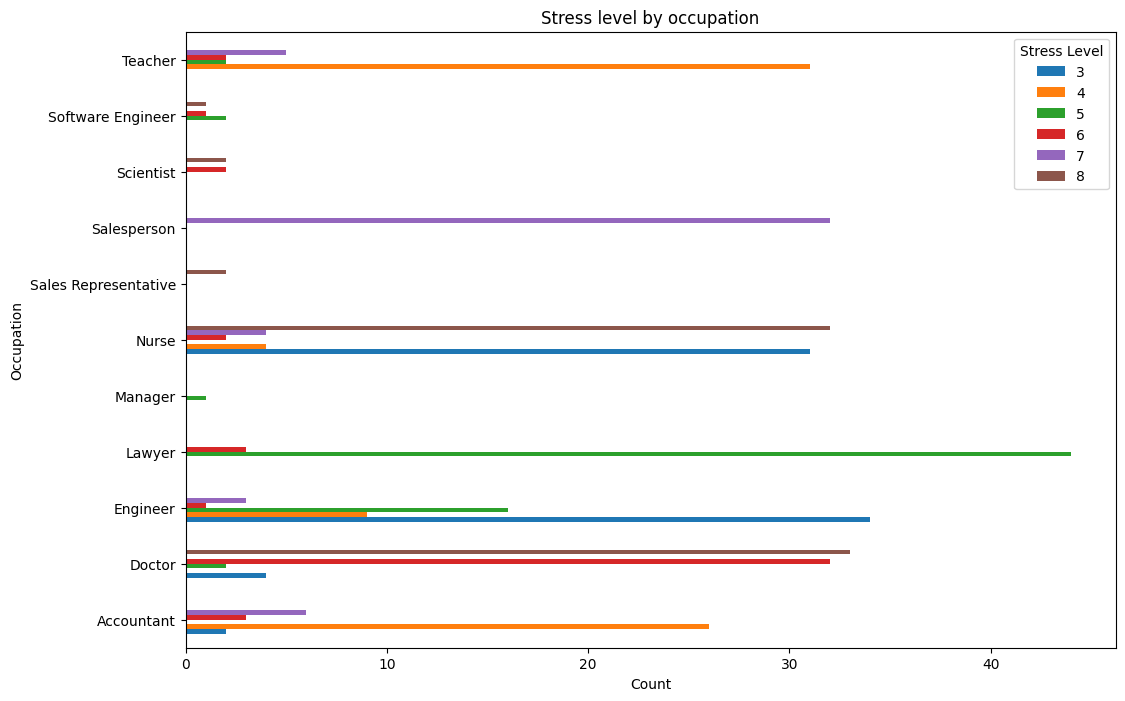

In [122]:
occupation_stress = data.groupby('Occupation')['Stress Level'].value_counts()
occupation_stress = occupation_stress.unstack(-1)
occupation_stress = occupation_stress.fillna(0.0)

occupation_stress.plot.barh(figsize=(12,8))
plt.xlabel('Count')
plt.title('Stress level by occupation')

plt.show()